In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tr = {'x1':[0.346, 0.303, 0.358, 0.602, 0.790, 0.611],
         'x2':[0.780, 0.439, 0.729, 0.863, 0.753, 0.965],
         'y' :[0, 0, 0, 1, 1, 1]}
  
te = {'x1':[0.959, 0.750, 0.395, 0.823, 0.761, 0.844],
         'x2':[0.382, 0.306, 0.760, 0.764, 0.874, 0.435],
         'y' :[0, 0, 0, 1, 1, 1]}
# Create DataFrame
train = pd.DataFrame(tr)
test = pd.DataFrame(te)

In [3]:
train_df =np.array(train).reshape(6,3,1)

In [4]:
x_train = train.drop('y', axis=1)
y_train = train['y']

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(6,1)

In [6]:
x_test = test.drop('y', axis=1)
y_test = test['y']
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(6,1)

In [7]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [8]:
def loss(y, y_hat,m):
    loss = (-1/m)*(np.sum(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat)))
    return loss

In [9]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [10]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [11]:
def plot_decision_boundary(X, w, b,y):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "sb")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "or")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [12]:
def train(w,b,X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
   # w = np.zeros((n,1))
   # b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b),m)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [13]:
def predict(X,w,b):
    
    # X --> Input.
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

Optimized weights: [2.16125033] [0.71068025]
Optimized intercept: -1.4760817503646968
Train Accuracy 1.0
Train Accuracy 0.6666666666666666


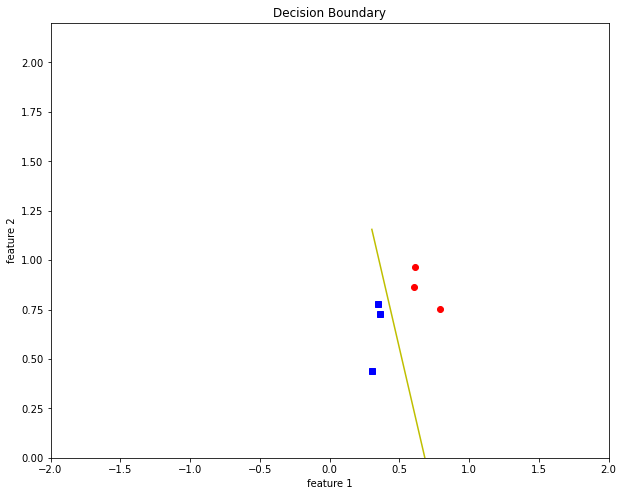

In [14]:
# Training 

from sklearn.metrics import accuracy_score

w, b, l = train( np.zeros((x_train.shape[1],1)), 0, x_train,  y_train, 10, 1000, 0.04)
# Plotting Decision Boundary
#print(x_train.shape)
plot_decision_boundary(train_df, w, b, y_train)
print("Optimized weights:" ,w[0],w[1])
print("Optimized intercept:",b)

pred_train =predict(x_train,w,b)
print('Train Accuracy',accuracy_score(pred_train.T, y_train))
pred_test =predict(x_test,w,b)
print('Train Accuracy',accuracy_score(pred_test.T, y_test))

# (b)(i) Logistic model P(ˆy = 1|x1, x2) and its cross-entropy error function

In [15]:
w = [1.5, 0.5]
b= -1

In [16]:
logistic_model = sigmoid(np.dot(w,x_train.T)+b)

In [17]:
#cross_entropy = loss(np.array(y_train), logistic_model, x_train.shape[0])
m= x_train.shape[0]
cross_entropy = (-1/m)*(np.sum((y_train*np.log(logistic_model)) + ((1-y_train)*(np.log(1-logistic_model)))))

print("Logistic model-P(ˆy = 1|x1, x2):",logistic_model)
print("Cross entropy loss:",cross_entropy)
#print(y_train)


Logistic model-P(ˆy = 1|x1, x2): [0.47726569 0.4192142  0.47539489 0.58285389 0.63679954 0.59844738]
Cross entropy loss: 4.24695047852859


# (b) (ii) Use gradient descent to update θ0, θ1, θ2 for one iteration. Write down the updated logistic regression model.

In [18]:
w = np.array([[1.5], [0.5]])
b = -1

w1, b1, losses = train(w,b,x_train, np.array(y_train), bs=10, epochs=1, lr=0.1)

Optimized weights : [1.50535086] [0.50196867]
Optimized intercept : -1.0031662597725644


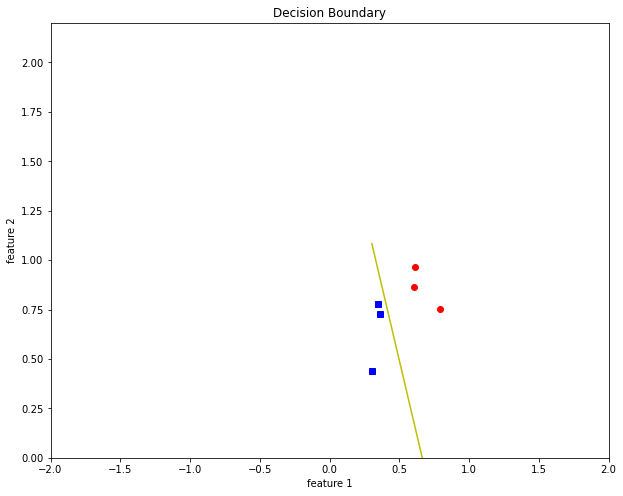

In [19]:
plot_decision_boundary(train_df, w, b, y_train)
print("Optimized weights :", w1[0],w1[1])
print("Optimized intercept :", b1)



# (b) (iii) At convergence of gradient descent, use the model to make predictions for all the samples in the test dataset. Calculate and report the accuracy, precision and recall to evaluate this model.

In [20]:
w = np.array([[1.5], [0.5]])
b = -1

In [21]:
w1,b1, cross_entropy = train(w,b,x_train, y_train, bs=10, epochs=100000, lr=0.1)

Optimized weights : [31.36347263] [7.53262099]
Optimized intercept : -21.19055157257816
Train Accuracy : 1.0
Test Accuracy : 0.6666666666666666
Precision : 0.6
Recall : 1.0


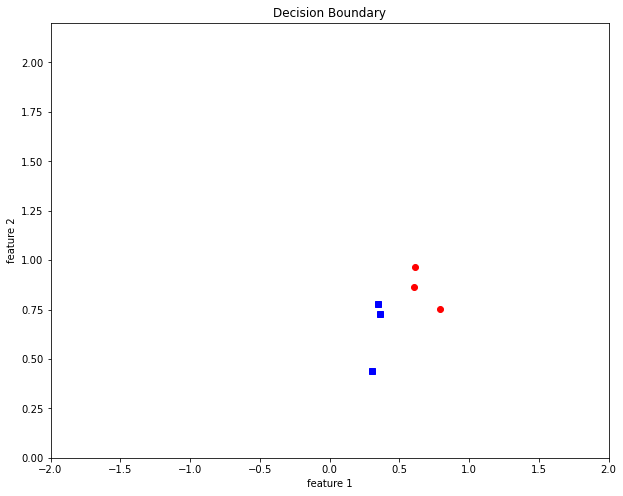

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

plot_decision_boundary(train_df, w, b, y_train)
print("Optimized weights :", w1[0],w1[1])
print("Optimized intercept :", b1)

pred_train =predict(x_train,w1,b1)
print('Train Accuracy :',accuracy_score(pred_train.T, y_train))
pred_test =predict(x_test,w1,b1)
print('Test Accuracy :',accuracy_score(pred_test.T, y_test))
print( 'Precision :',precision_score(y_test,predict(x_test,w1,b1)))
print( 'Recall :',recall_score(y_test,predict(x_test,w1,b1)))
